In [4]:
import os, re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

TABLES_DIRECTORY = "../../Data/giant_new_tables"

In [5]:
taper_hup_ids = [142, 145, 151, 166, 177, 180]
taper_start_minutes = [3500, 7500, 6000, 4000, 6000, 4000]
thresholds = [4, 4.3, 4, 4.1, 4, 4]
thresholds = np.exp(thresholds)

HUP 142


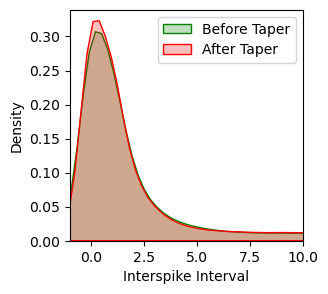

HUP 145


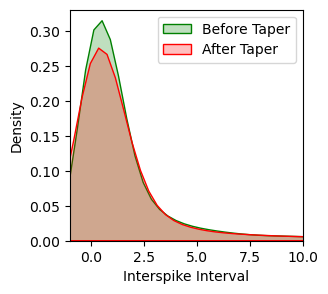

HUP 151


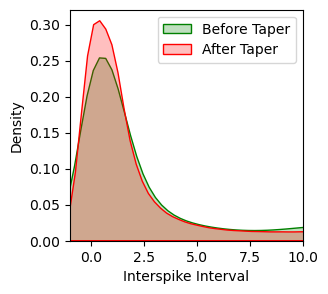

HUP 166


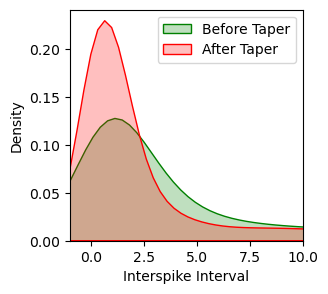

HUP 177


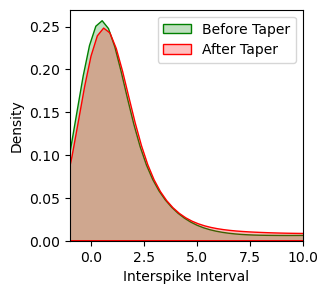

HUP 180


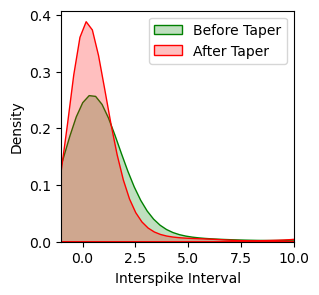

In [7]:
for idx, patient_hup_id in enumerate(taper_hup_ids):
    print(f"HUP {patient_hup_id}")
    plt.figure(figsize=(3, 3))

    # Load the dataframes
    hourly_patient_features_df = pd.read_csv(
        os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_hup_id)}.csv")
    )

    spikes_df = pd.read_csv(f"../../Public/spikes/HUP_{patient_hup_id}.csv")

    # Filter the interspike intervals below the threshold
    spikes_below_threshold = spikes_df[
        spikes_df["inter_spike_interval_samples"] < thresholds[idx]
    ]

    # Fetch the taper_start_time for this patient from taper_start_minutes
    taper_start_time = taper_start_minutes[idx]

    # Define the first seizure time after taper_start_time
    first_seizure_time = hourly_patient_features_df[
        (hourly_patient_features_df["emu_minute"] > taper_start_time)
        & (hourly_patient_features_df["had_seizure"] >= 1)
    ]["emu_minute"].min()

    # Get 'after' period (time between taper_start_time and first_seizure_time)
    after_period = spikes_below_threshold[
        (
            spikes_below_threshold["peak_time_microseconds"] / (60 * 1e6)
            >= taper_start_time
        )
        & (
            spikes_below_threshold["peak_time_microseconds"] / (60 * 1e6)
            < first_seizure_time
        )
    ]
    after_interspikes = after_period["inter_spike_interval_samples"].values

    # Determine the 'before' period based on the length of the 'after' period
    before_period = spikes_below_threshold[
        spikes_below_threshold["peak_time_microseconds"] / (60 * 1e6) < taper_start_time
    ].tail(len(after_interspikes))
    before_interspikes = before_period["inter_spike_interval_samples"].values

    # Assert there are no negative values in before_interspikes
    assert np.all(before_interspikes >= 0)
    # Assert there are no negative values in after_interspikes
    assert np.all(after_interspikes >= 0)

    sns.kdeplot(before_interspikes, fill=True, color="green", label="Before Taper")
    sns.kdeplot(after_interspikes, fill=True, color="red", label="After Taper")

    plt.xlabel("Interspike Interval")
    plt.ylabel("Density")
    # plt.title(
    #     f"ASM Taper Shifts Interspike Interval Distribution for Patient {patient_hup_id}"
    # )
    plt.xlim(-1, 10)

    plt.legend()
    plt.show()

## Reinitiation

In [13]:
reinitiation_hup_ids = [142, 145, 166, 173, 177, 180]
reinitiation_start_time_minutes = [17700, 16500, 9950, 12500, 12050, 9450]
assert len(reinitiation_hup_ids) == len(reinitiation_start_time_minutes)

thresholds = [4, 4.3, 4.1, 3, 4, 4]
thresholds = np.exp(thresholds)

HUP 142


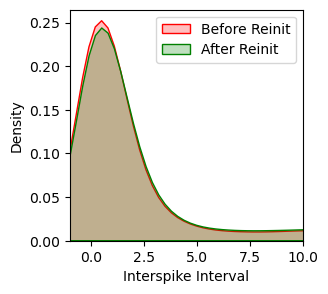

HUP 145


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


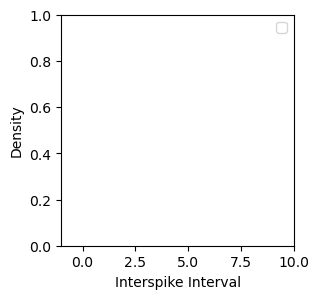

HUP 166


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


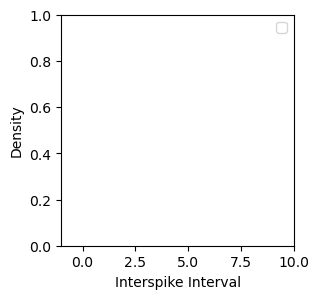

HUP 173


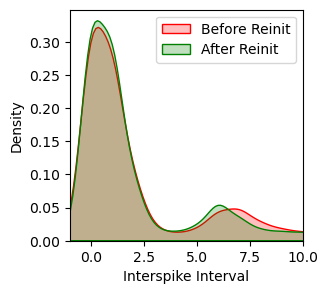

HUP 177


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


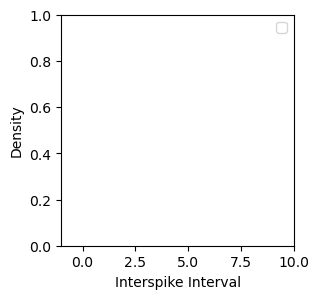

HUP 180


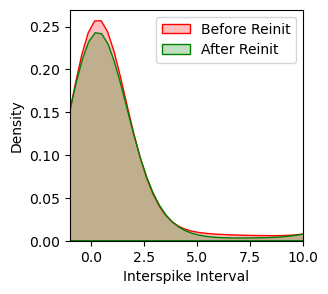

In [17]:
for idx, patient_hup_id in enumerate(reinitiation_hup_ids):
    print(f"HUP {patient_hup_id}")
    plt.figure(figsize=(3, 3))

    # Load the dataframes
    hourly_patient_features_df = pd.read_csv(
        os.path.join(TABLES_DIRECTORY, f"HUP_{str(patient_hup_id)}.csv")
    )

    spikes_df = pd.read_csv(f"../../Public/spikes/HUP_{patient_hup_id}.csv")

    # Filter the interspike intervals below the threshold
    spikes_below_threshold = spikes_df[
        spikes_df["inter_spike_interval_samples"] < thresholds[idx]
    ]

    # Fetch the reinitiation_start_time for this patient from reinitiation_start_time_minutes
    reinitiation_start_time = reinitiation_start_time_minutes[idx]

    # Get 'after' period
    after_period = spikes_below_threshold[
        (
            spikes_below_threshold["peak_time_microseconds"] / (60 * 1e6)
            >= reinitiation_start_time
        )
        & (
            spikes_below_threshold["peak_time_microseconds"] / (60 * 1e6)
            <= hourly_patient_features_df.dropna(subset=["synchrony_broadband"])[
                "emu_minute"
            ].max()
        )
    ]
    after_interspikes = after_period["inter_spike_interval_samples"].values

    # Determine the 'before' period based on the length of the 'after' period
    before_period = spikes_below_threshold[
        spikes_below_threshold["peak_time_microseconds"] / (60 * 1e6)
        < reinitiation_start_time
    ].tail(len(after_interspikes))
    before_interspikes = before_period["inter_spike_interval_samples"].values

    # Assert there are no negative values in before_interspikes
    assert np.all(before_interspikes >= 0)
    # Assert there are no negative values in after_interspikes
    assert np.all(after_interspikes >= 0)

    sns.kdeplot(before_interspikes, fill=True, color="red", label="Before Reinit")
    sns.kdeplot(after_interspikes, fill=True, color="green", label="After Reinit")

    plt.xlabel("Interspike Interval")
    plt.ylabel("Density")
    plt.xlim(-1, 10)
    plt.legend()
    plt.show()